In [2]:
%cd drive/MyDrive/noval-seam-carving-method/

/content/drive/MyDrive/noval-seam-carving-method


In [3]:
from myfunctions import SM_creator, GM_creator, DM_creator
from seam_carving_functions import *
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
import myvariables
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


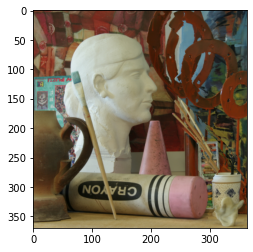

In [ ]:
im = remove_columnar_seams1(100)
im2 = im.astype(np.uint8)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2);

/content/drive/MyDrive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


(370, 463, 3)


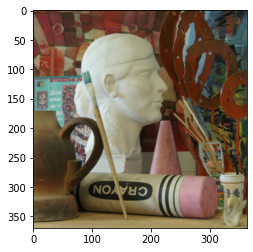

In [ ]:
im3 = remove_columnar_seams2(100)
im4 = im3.astype(np.uint8)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
plt.imshow(im4);

In [ ]:
 energy_list1 = find_energy_range1(100)

In [6]:
energy_list2 = find_energy_range2(50)

/content/drive/My Drive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


In [ ]:
counter = 0
itr = 0
os.system('cp images/view1.png img_temp/img_temp.png')
os.system('cp depth_map/disp1.png disp_temp/disp_temp.png')
emap = produce_emap(1)
image = cv2.imread(myvariables._orgimg_path)
disp = cv2.imread(myvariables._dispimg_path)
while counter < 20:
  minval, minIndex, sOfIJ = find_seam(image, emap)
  k = np.where(sOfIJ[sOfIJ.shape[0]-1,:] == energy_list2[itr])
  try:
    index = k[0][0]
    image = insert_seam(image, k, sOfIJ)
    disp = insert_seam(disp, k[0], sOfIJ)
    cv2.imwrite(myvariables.orgimg_path, image)
    cv2.imwrite(myvariables.dispimg_path, disp)
    emap = produce_emap(0)
    counter = counter + 1
    print(counter)
  except:
    index = 0
  itr = itr + 1


# First scaling

In [ ]:
output_h = 111
output_w = 165
input_h = 120
input_w = 180

In [ ]:
new_w = round((input_w*output_h)/input_h)
new_h = round((input_h*output_w)/input_w)

In [ ]:
(output_h, new_w) , (new_h, output_w)

((111, 166), (110, 165))

In [ ]:
input_img = zeros((120,180))

In [ ]:
if new_w > output_w:
  output_img = cv2.resize(input_img, (output_h, new_w))
  horizontal_seams_num = 0
  vertical_seams_num = new_w - output_w
elif new_h > output_h:
  output_img = cv2.resize(input_img, (new_h, output_w))
  horizontal_seams_num = new_h - output_h
  vertical_seams_num = 0

In [ ]:
horizontal_seams_num, vertical_seams_num

(0, 1)

/content/drive/MyDrive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


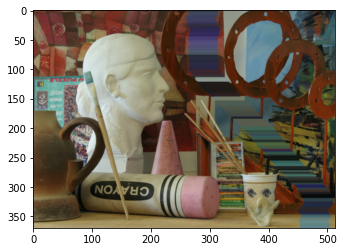

In [ ]:
result = insert_vertical_seams1(50)
result = result.astype(np.uint8)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result);

/content/drive/MyDrive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)


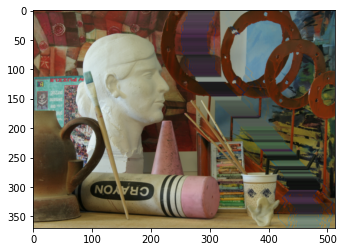

In [ ]:
result = insert_vertical_seams2(50)
result = result.astype(np.uint8)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result);

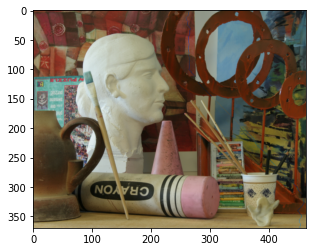

In [ ]:
secondary_img = insert_seam(ORG_image, minIndex, sOfIJ)
s = secondary_img.astype(np.uint8)
s = cv2.cvtColor(s, cv2.COLOR_BGR2RGB)
plt.imshow(s)

# Show maps

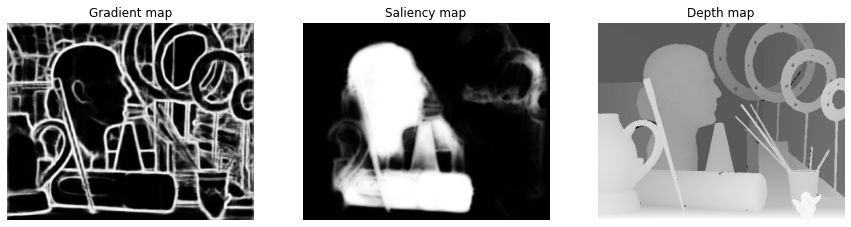

In [ ]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,3,1)
plt.imshow(gradient_map, cmap = 'gray')
plt.axis('off')
plt.title("Gradient map")
fig.add_subplot(1,3,2)
plt.imshow(saliency_map, cmap = 'gray')
plt.axis('off')
plt.title("Saliency map")
fig.add_subplot(1,3,3)
plt.imshow(depth_map, cmap = 'gray')
plt.axis('off')
plt.title("Depth map");

In [ ]:
new_map = (2*gradient_map + 4*saliency_map + depth_map)/7

Text(0.5, 1.0, 'Original image')

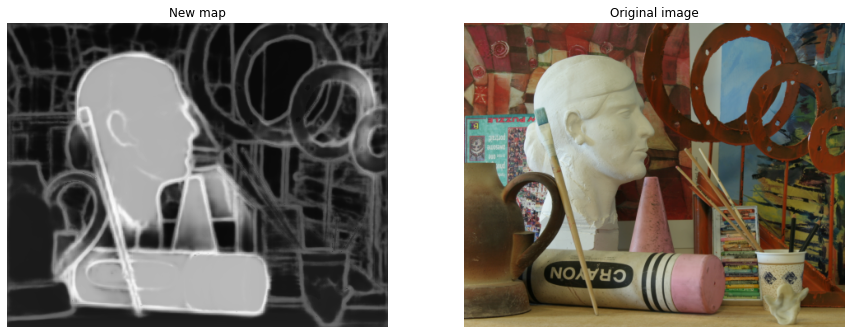

In [ ]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,2,1)
plt.imshow(new_map, cmap = 'gray')
plt.axis('off')
plt.title("New map")
fig.add_subplot(1,2,2)
ORG_image = cv2.imread(_orgimg_path)
RGB_image = cv2.cvtColor(ORG_image, cv2.COLOR_BGR2RGB)
plt.imshow(BGR_image)
plt.axis('off')
plt.title("Original image")

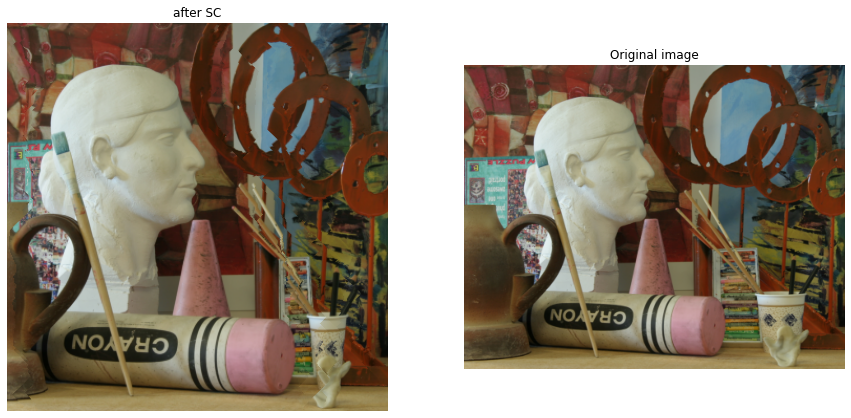

In [ ]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,2,1)
first_result = first_result.astype(np.uint8)
first_result = cv2.cvtColor(first_result, cv2.COLOR_BGR2RGB)
plt.imshow(first_result)
plt.axis('off')
plt.title("after SC")
fig.add_subplot(1,2,2)
plt.imshow(RGB_image)
plt.axis('off')
plt.title("Original image");

### 25 Second

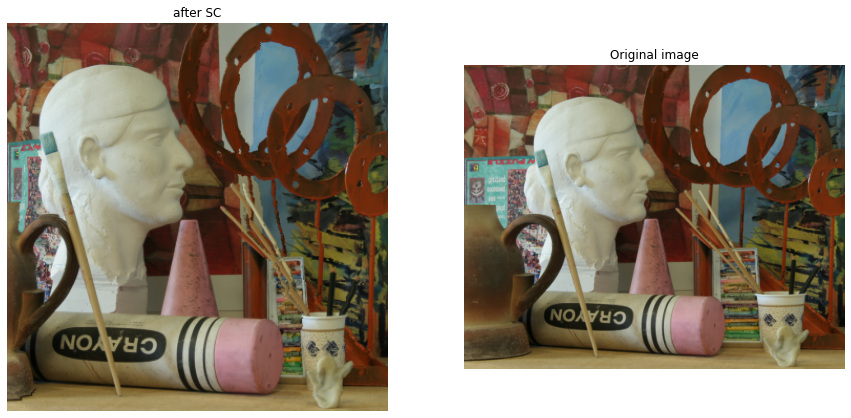

In [ ]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,2,1)
second_result = second_result.astype(np.uint8)
second_result = cv2.cvtColor(second_result, cv2.COLOR_BGR2RGB)
plt.imshow(second_result)
plt.axis('off')
plt.title("after SC")
fig.add_subplot(1,2,2)
plt.imshow(RGB_image)
plt.axis('off')
plt.title("Original image");

### 5 Minutes and 27 Seconds



# Compare the last two methods

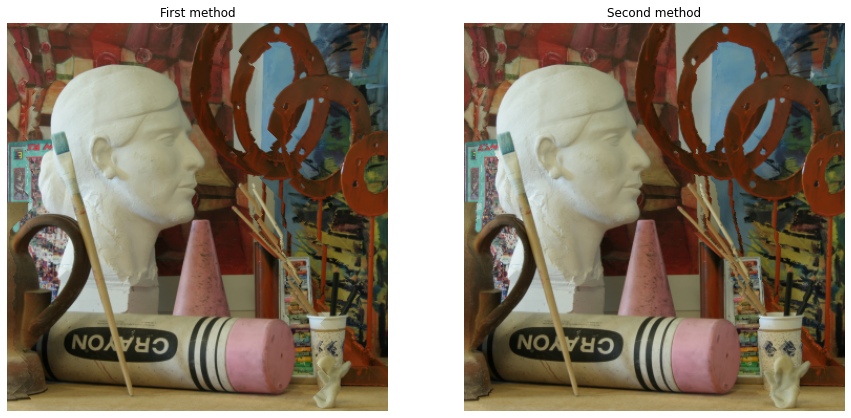

In [ ]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,2,1)
plt.imshow(first_result)
plt.axis('off')
plt.title("First method")
fig.add_subplot(1,2,2)
plt.imshow(second_result)
plt.axis('off')
plt.title("Second method");

In [ ]:
g_importance = gradient_map.sum()/(gradient_map.shape[0]*gradient_map.shape[1])
s_importance = saliency_map.sum()/(saliency_map.shape[0]*saliency_map.shape[1])
d_importance = depth_map.sum()/(depth_map.shape[0]*depth_map.shape[1])

In [ ]:
print(gradient_map.sum()/(gradient_map.shape[0]*gradient_map.shape[1]))
print(saliency_map.sum()/(saliency_map.shape[0]*saliency_map.shape[1]))
print(depth_map.sum()/(depth_map.shape[0]*depth_map.shape[1]))

0.2629823583707898
0.284198031893935
0.5212375455114624


In [ ]:
g_coe = 2*g_importance
s_coe = 4*s_importance
d_coe = 3*d_importance

In [ ]:
coe_emap = (g_coe*gradient_map + s_coe*saliency_map + d_coe*depth_map)/(g_coe + s_coe + d_coe)

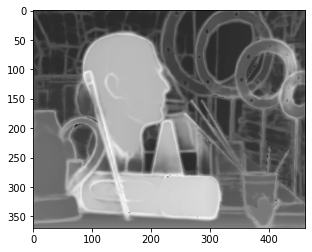

In [ ]:
plt.imshow(coe_emap, cmap='gray')
plt.show()